In [2]:
import os
import sys
from readrec import *
import matplotlib
from scipy.signal import find_peaks
import numpy as np
import pandas as pd
import re

from scipy.constants import speed_of_light

c = speed_of_light

sps = 10e6 # 10 Msps

%matplotlib inline
%config InlineBackend.close_figures=True

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
from readrec import loadrec, assign_time_axis  # Assuming readrec.py contains these functions

def multistation_plotrec(files):
    channels = [0, 1, 3]
    nrows = len(channels) * len(files)
    fig, axs = plt.subplots(figsize=(35, 7 * nrows), nrows=nrows, sharex=True)
    
    mintime = None
    data = []
    
    # Load and process data
    for filepath in files:
        try:
            with open(filepath, 'rb') as file:
                fn = os.path.basename(filepath)
                h, samples, synclog = loadrec(file)
                t2s, s2t, ticker, formatter = assign_time_axis(fn, h, synclog)
                
                time = s2t(0)
                mintime = time if mintime is None else min(mintime, time)

                # Add data to the list for later processing
                data.append((filepath, h, samples, synclog, t2s, s2t, ticker, formatter))
        except Exception as e:
            print(f"Exception: {e}")

    # Render data
    ax_idx = 0
    for i, (filepath, h, samples, synclog, t2s, s2t, ticker, formatter) in enumerate(data):
        offset = -int(t2s(mintime))
        
        # Use full path for the file label only once above the first channel
        axs[ax_idx].set_title(f"File: {filepath}", fontsize=40, pad=20)

        for ch in channels:
            a = (h['preTrigger'] - h['preTrigger']) * h['descSpan'] // 16
            b = (h['preTrigger'] + h['postTrigger']) * h['descSpan'] // 16
            signal_samples = samples[a:b, ch]
            
            axs[ax_idx].xaxis.set_major_locator(ticker)
            axs[ax_idx].xaxis.set_major_formatter(formatter)
            axs[ax_idx].plot(range(a + offset, b + offset), signal_samples, linestyle="", marker=".", alpha=0.5, markersize=1)
            
            # Improved channel label visibility
            axs[ax_idx].annotate(f"Channel: {ch}", xy=(0.01, 0.85), xycoords='axes fraction', fontsize=30, backgroundcolor='white')
            
            axs[ax_idx].tick_params(axis='x', which='major', labelsize=35)
            axs[ax_idx].tick_params(axis='y', which='major', labelsize=35)
            
            ax_idx += 1

    plt.tight_layout()
    plt.show()

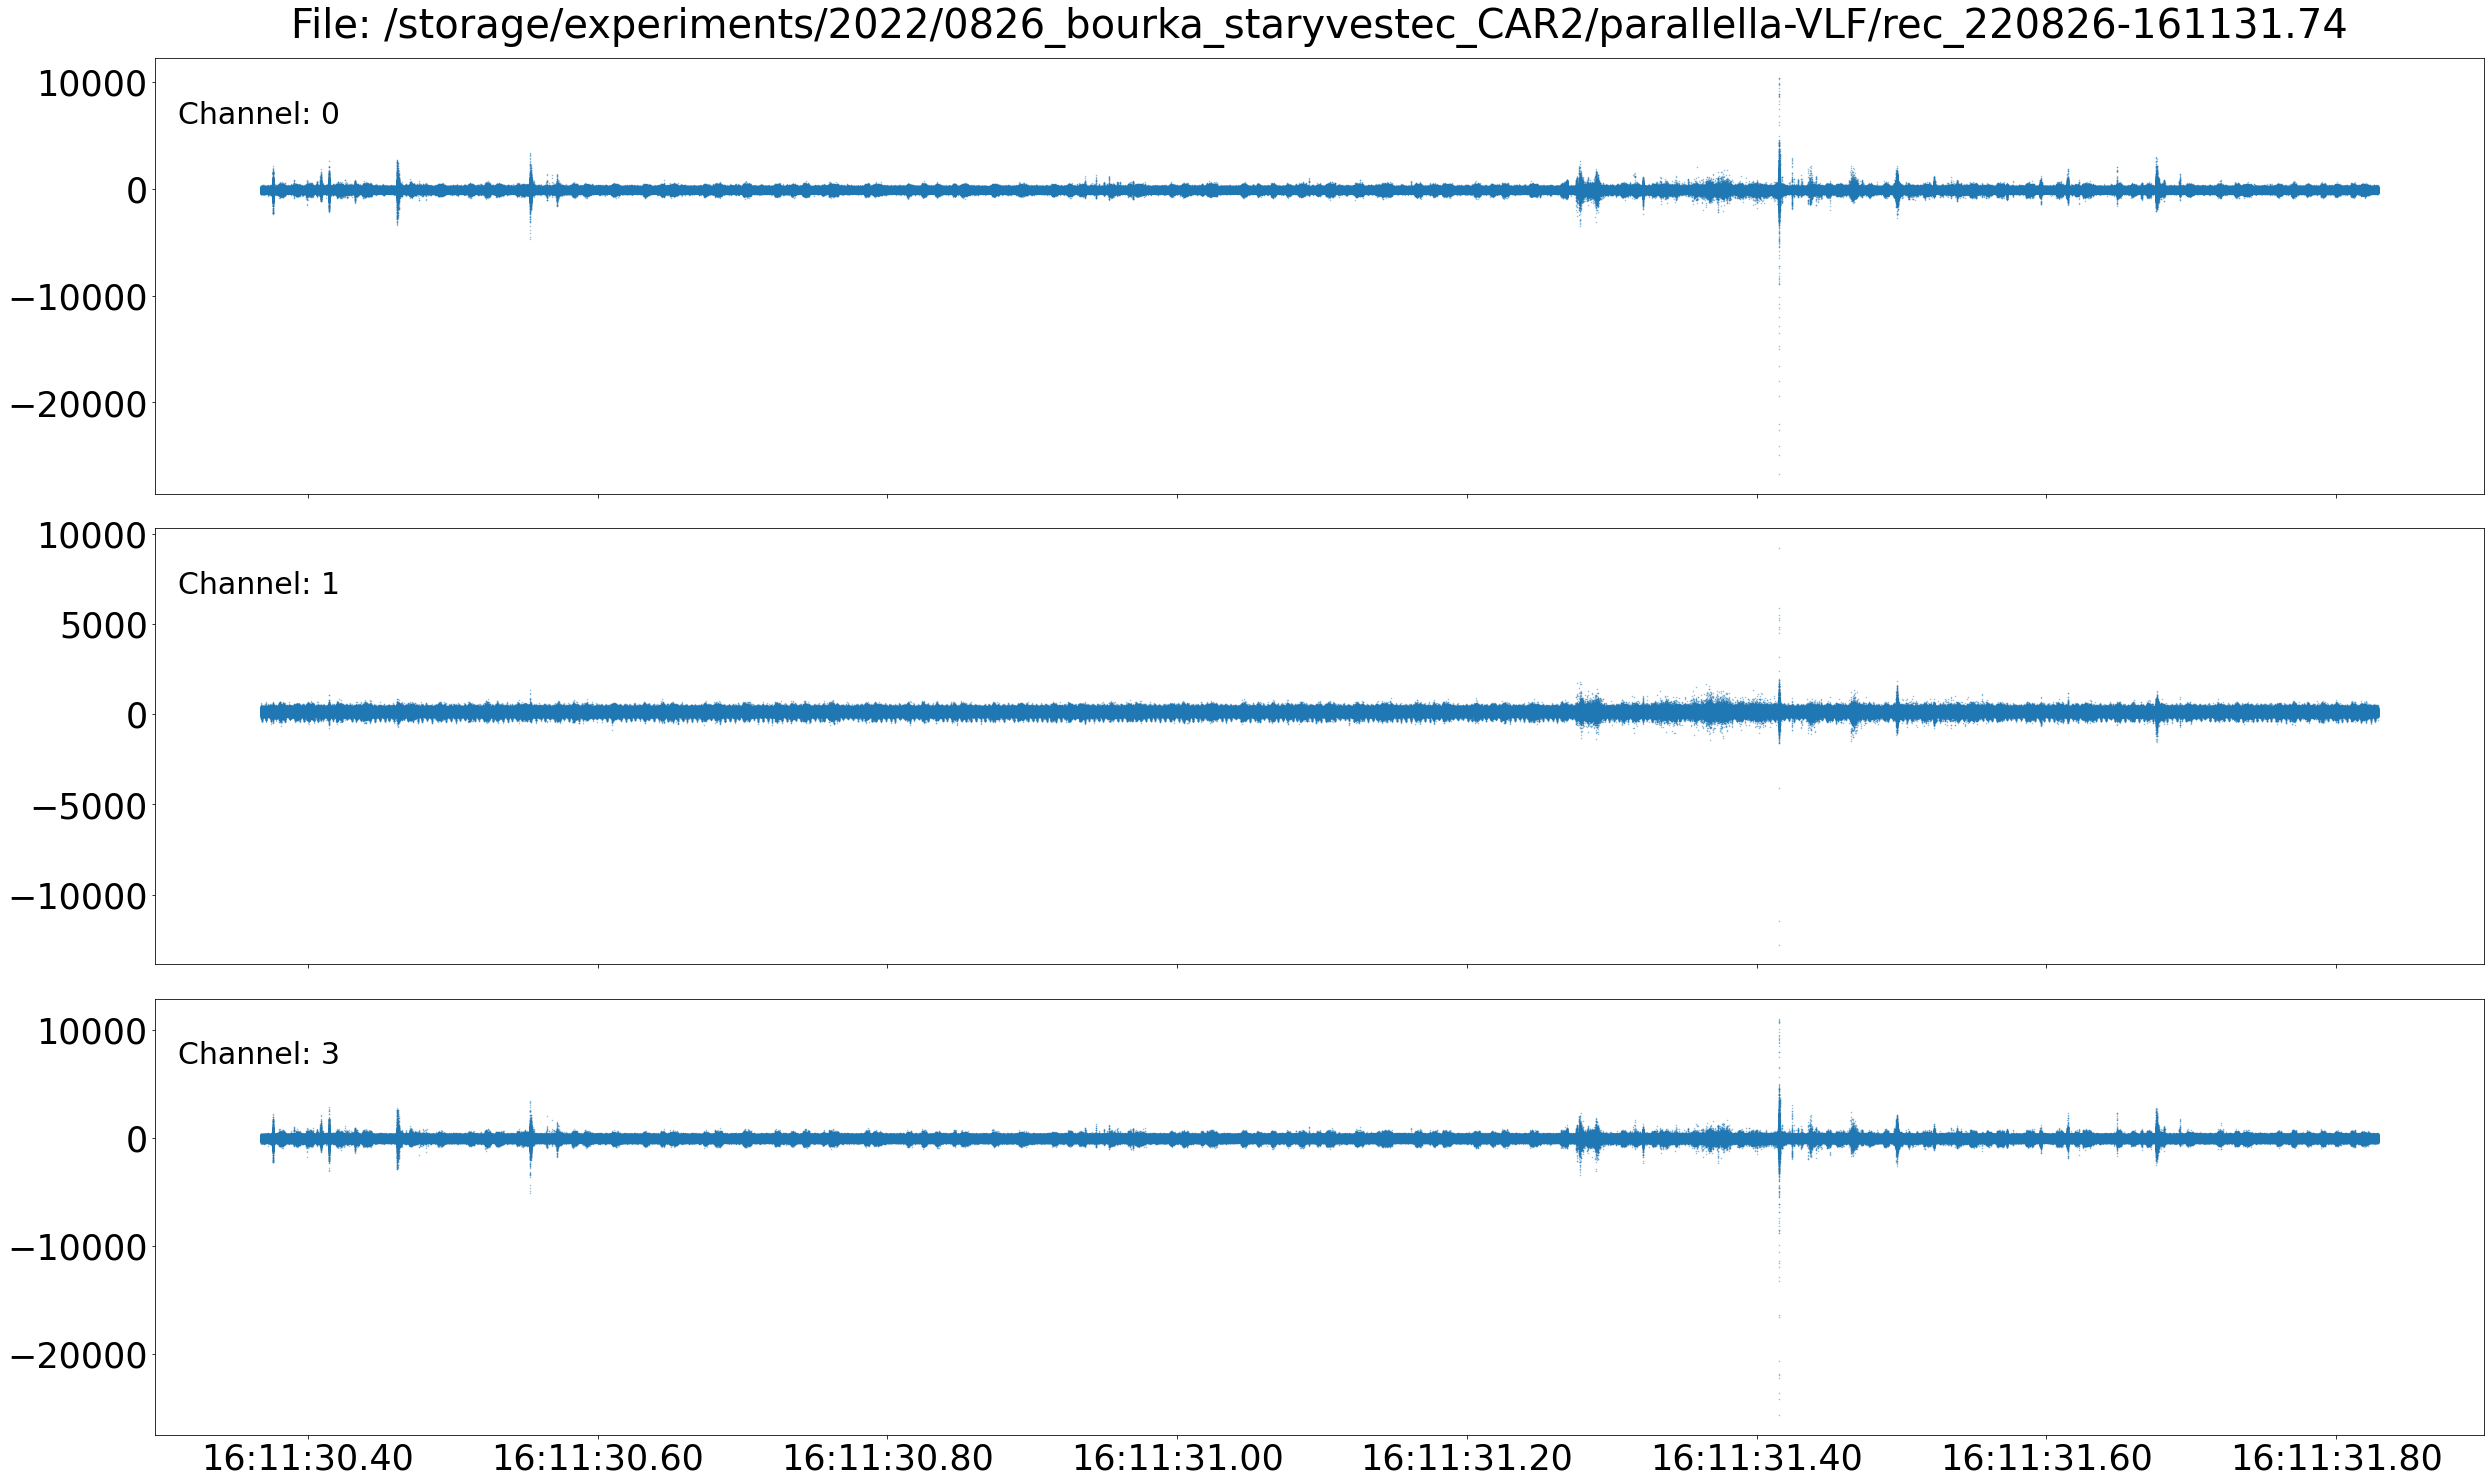

In [5]:
## Bourka hnědouhelné doly 
#files = ['/storage/experiments/2022/0909_bourka_CAR2/parallella-VLF/rec_220909-161250.80',
#         '/storage/experiments/2022/0909_bourka_CAR0/parallella-VLF/rec_220909-161250.80',
#         '/storage/experiments/2022/0909_bourka_CAR1/parallella-VLF/rec_220909-161250.81']

#files = ['/storage/experiments/2022/0826_bourka_staryvestec_CAR2/parallella-VLF/rec_220826-163022.70',
#         '/storage/experiments/2022/0826_bourka_staryvestec_CAR0/parallella-VLF/rec_220826-163022.43',
#         '/storage/experiments/2022/0826_bourka_staryvestec_CAR1/parallella/rec_220826-163022.62']

#files = ['/storage/experiments/2022/0826_bourka_staryvestec_CAR2/parallella-VLF/rec_220826-163022.70']

files = ['/storage/experiments/2022/0826_bourka_staryvestec_CAR2/parallella-VLF/rec_220826-160903.93']


multistation_plotrec(files)

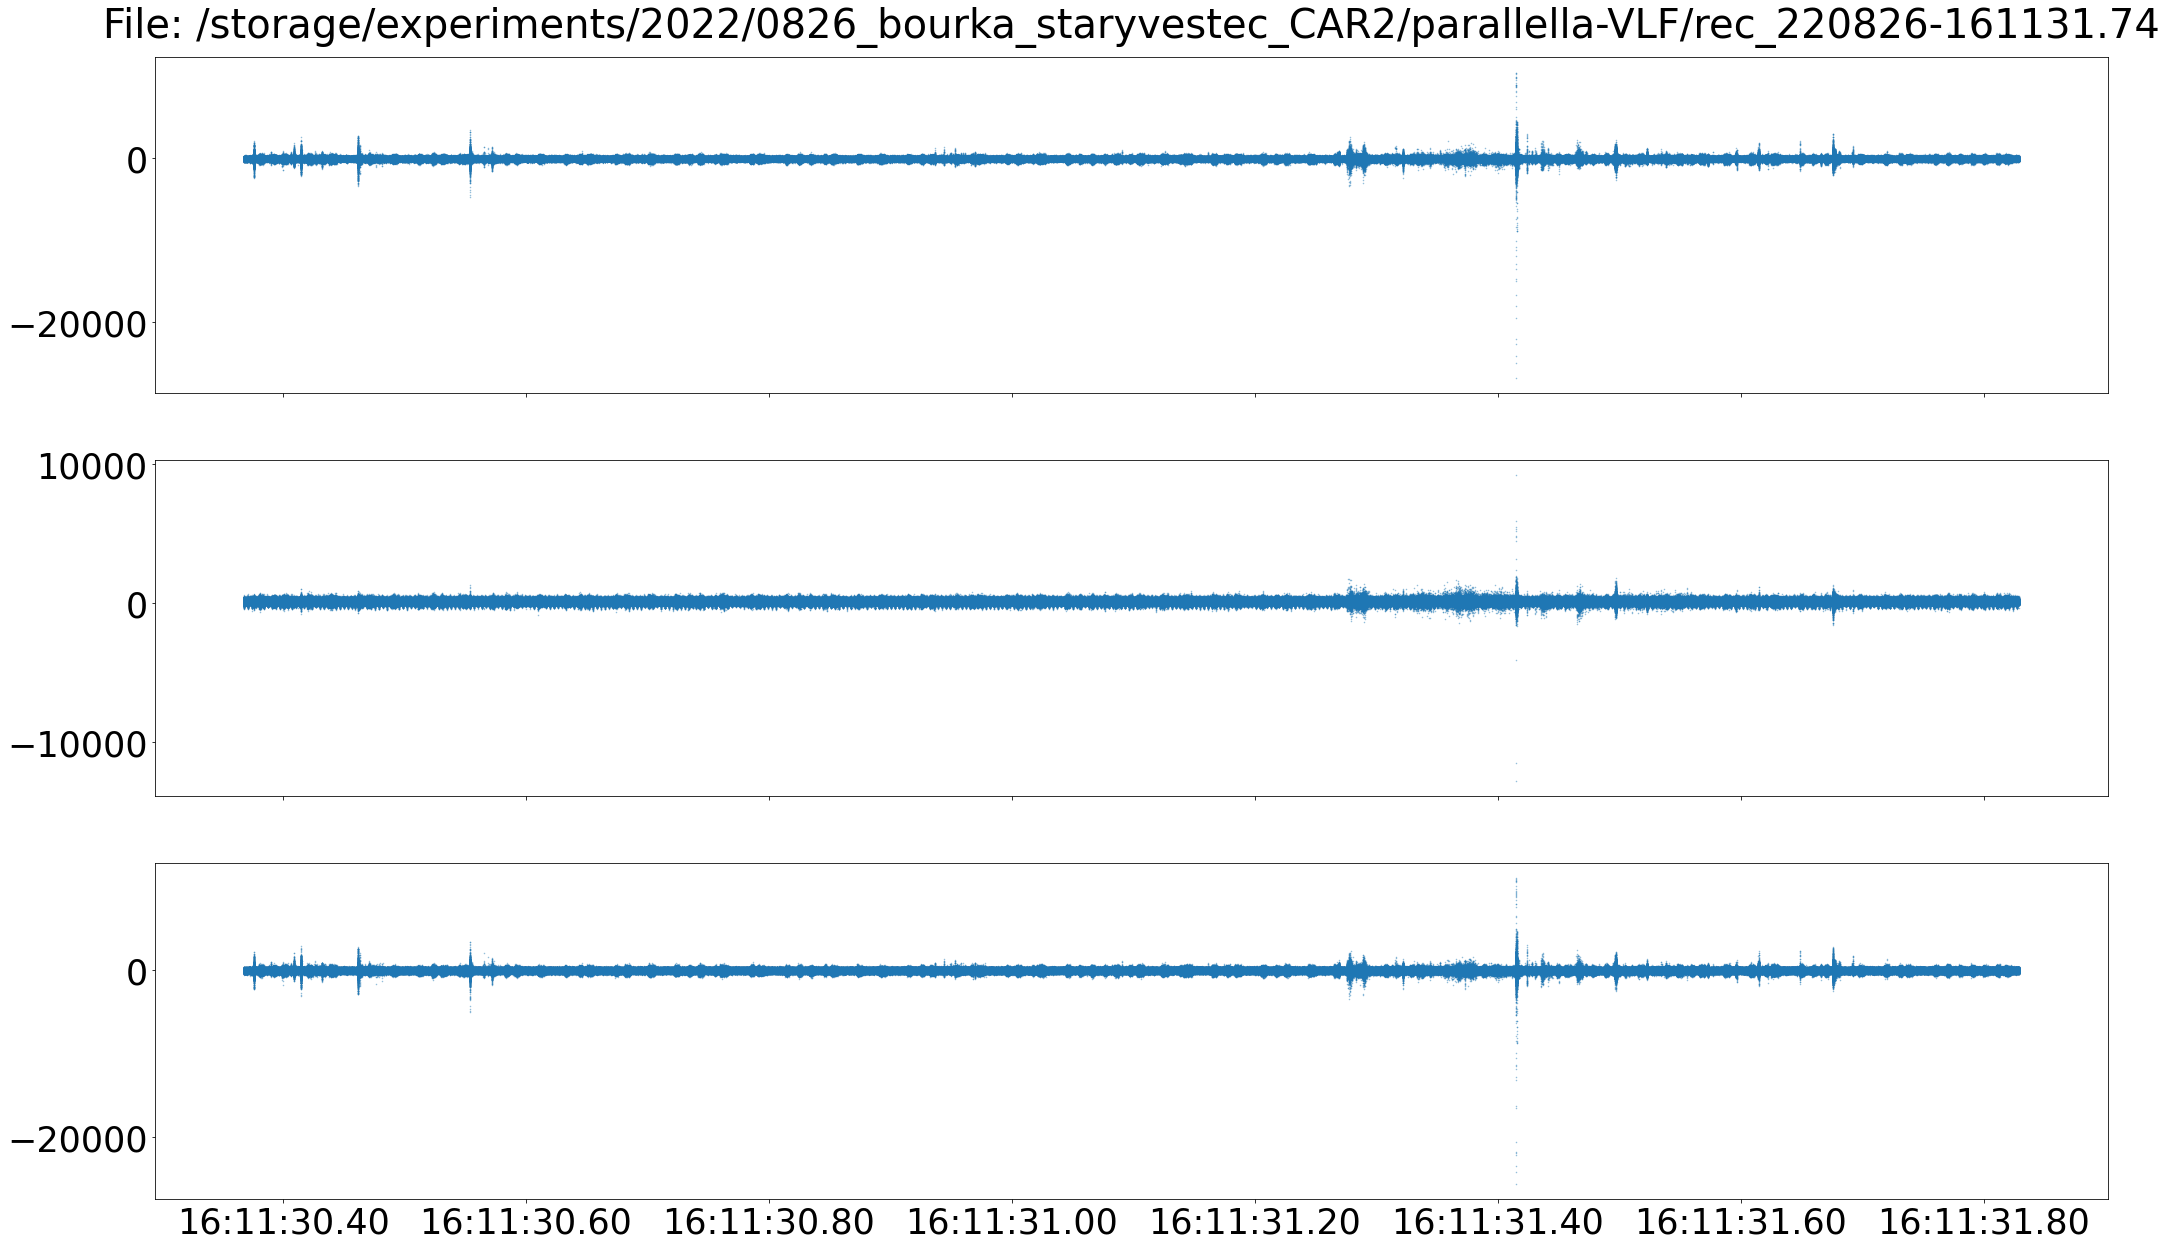

In [7]:

filepath = '/storage/experiments/2022/0826_bourka_staryvestec_CAR2/parallella-VLF/rec_220826-161131.74'

channels = [0, 1, 3]
nrows = len(channels) * 1
fig, axs = plt.subplots(figsize=(35, 7 * nrows), nrows=nrows, sharex=True)

mintime = None
data = []

# Load and process data
try:
    with open(filepath, 'rb') as file:
        fn = os.path.basename(filepath)
        h, samples, synclog = loadrec(file)
        t2s, s2t, ticker, formatter = assign_time_axis(fn, h, synclog)

        time = s2t(0)
        mintime = time if mintime is None else min(mintime, time)

        # Add data to the list for later processing
        data.append((filepath, h, samples, synclog, t2s, s2t, ticker, formatter))
except Exception as e:
    print(f"Exception: {e}")

# Render data
ax_idx = 0
for i, (filepath, h, samples, synclog, t2s, s2t, ticker, formatter) in enumerate(data):
    offset = -int(t2s(mintime))

    # Use full path for the file label only once above the first channel
    axs[ax_idx].set_title(f"File: {filepath}", fontsize=40, pad=20)

    a = (h['preTrigger'] - h['preTrigger']) * h['descSpan'] // 16
    b = (h['preTrigger'] + h['postTrigger']) * h['descSpan'] // 16
    for ch in channels:
        signal_samples = samples[a:b, ch]

        axs[ax_idx].xaxis.set_major_locator(ticker)
        axs[ax_idx].xaxis.set_major_formatter(formatter)
        axs[ax_idx].plot(range(a + offset, b + offset), signal_samples, linestyle="", marker=".", alpha=0.5, markersize=1)

        axs[ax_idx].tick_params(axis='x', which='major', labelsize=35)
        axs[ax_idx].tick_params(axis='y', which='major', labelsize=35)

        ax_idx += 1


plt.show()

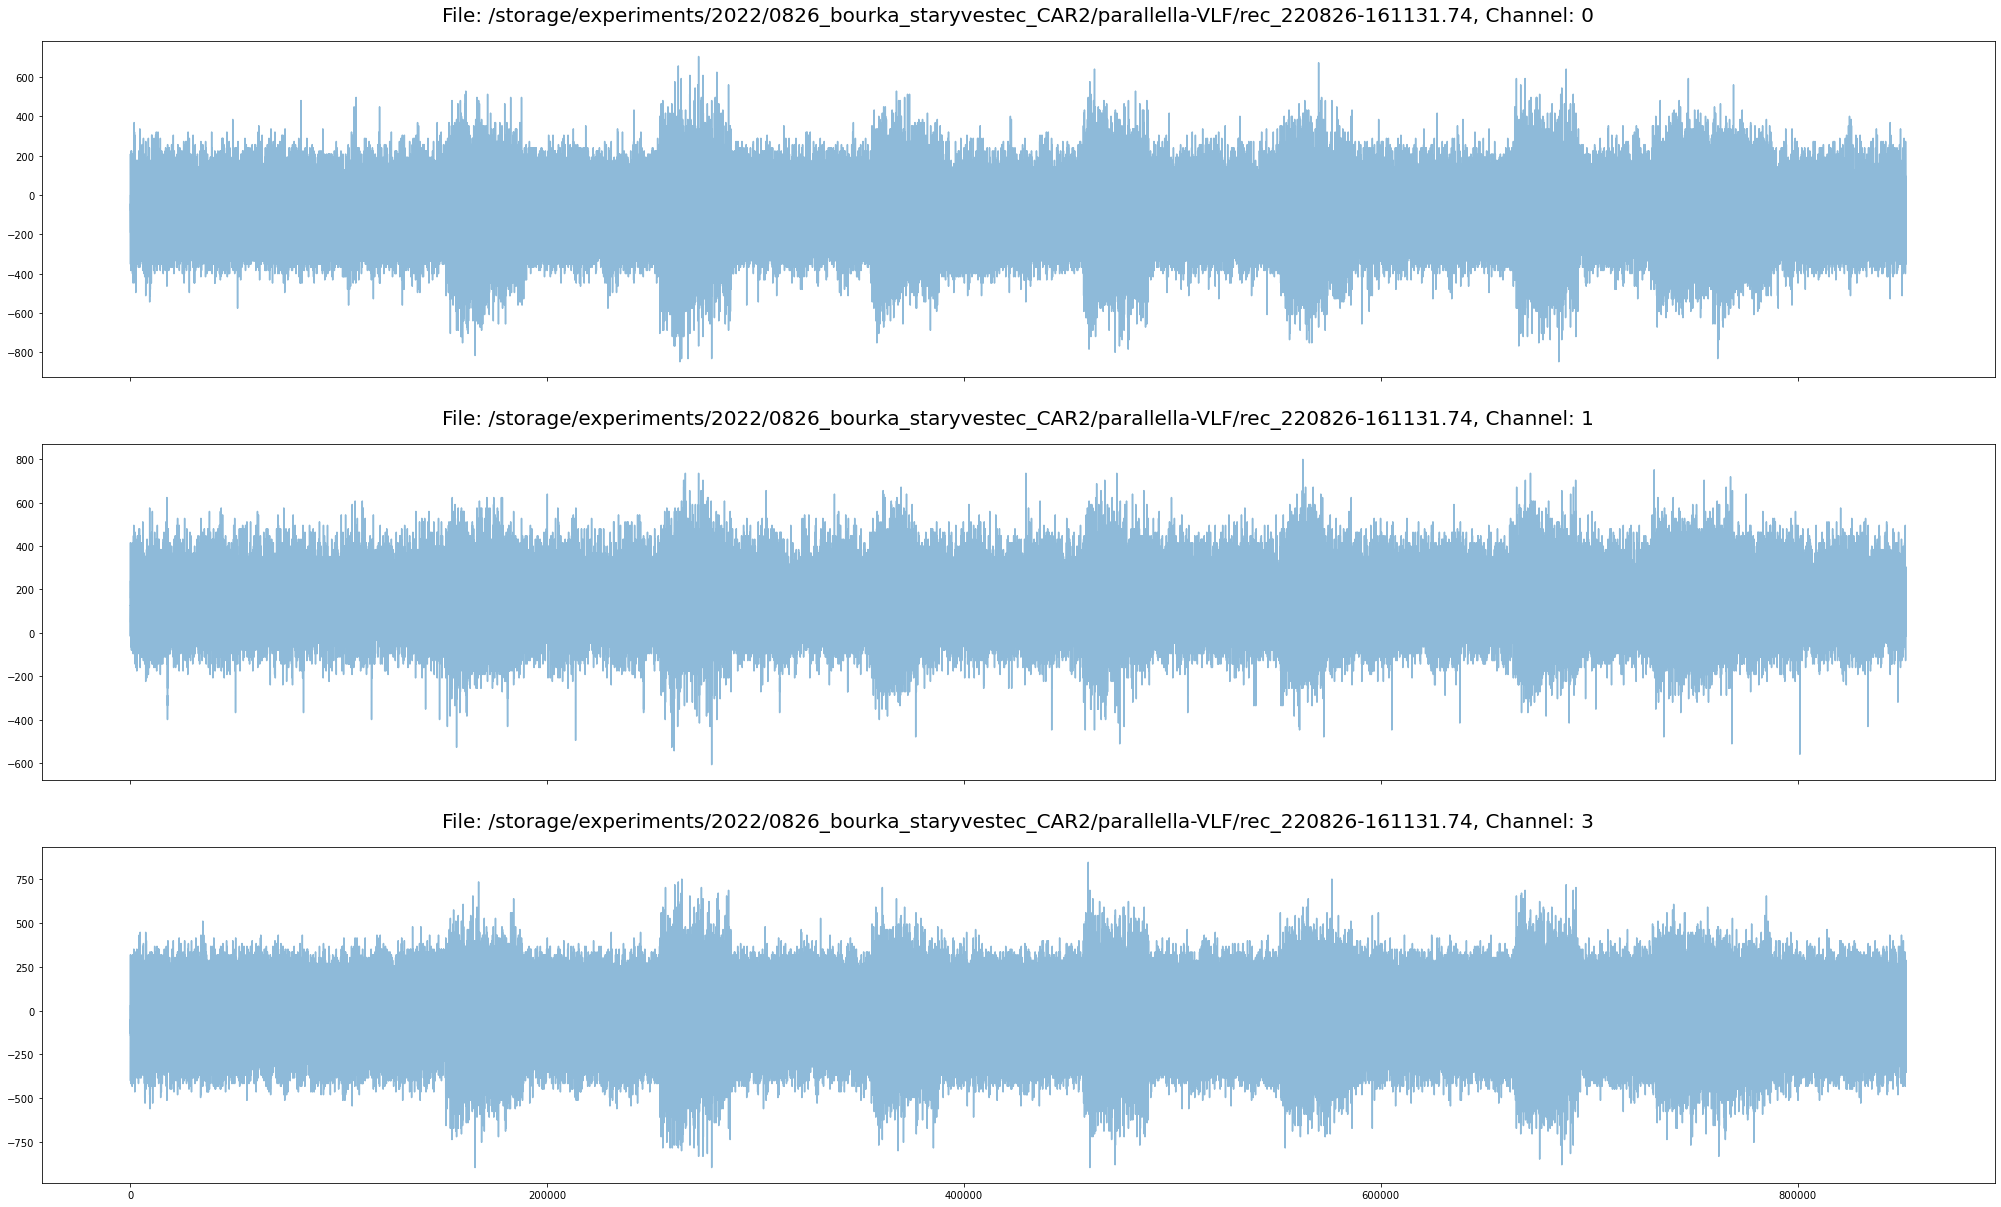

In [18]:
import matplotlib.pyplot as plt
import os

# Předpokládáme, že 'loadrec' a 'assign_time_axis' jsou definovány v externím modulu
from readrec import loadrec, assign_time_axis

filepath = '/storage/experiments/2022/0826_bourka_staryvestec_CAR2/parallella-VLF/rec_220826-161131.74'

channels = [0, 1, 3]
nrows = len(channels)
fig, axs = plt.subplots(figsize=(35, 7 * nrows), nrows=nrows, sharex=True)

data = []

# Nahrání a zpracování dat
with open(filepath, 'rb') as file:
    fn = os.path.basename(filepath)
    h, samples, synclog = loadrec(file)
    t2s, s2t, ticker, formatter = assign_time_axis(fn, h, synclog)

    time = s2t(0)

    # Přidání dat do seznamu pro pozdější zpracování
    data.append((filepath, h, samples, synclog, t2s, s2t, ticker, formatter))

# Vykreslení dat
for i, (filepath, h, samples, synclog, t2s, s2t, ticker, formatter) in enumerate(data):
    a = h['preTrigger'] * h['descSpan'] // 16
    b = (h['preTrigger'] + h['postTrigger']) * h['descSpan'] // 16
    time_a = s2t(a)
    time_b = s2t(b - 1)

    for ax, ch in zip(axs, channels):
        signal_samples = samples[a:b, ch]

        # Nastavení rozsahu a značek na ose x
        #ax.set_xlim(time_a, time_b)

        ax.set_title(f"File: {filepath}, Channel: {ch}", fontsize=20, pad=20)
        #ax.plot(range(a, b), signal_samples, linestyle="", marker=".", alpha=0.5, markersize=1)
        ax.plot(signal_samples,  alpha=0.5, markersize=1)

plt.show()


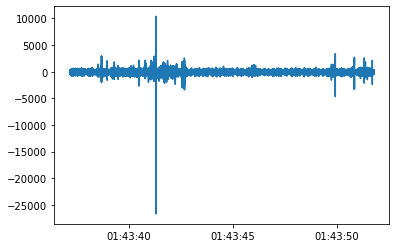

In [29]:
import datetime
base = datetime.datetime.today()
plt.plot([base - datetime.timedelta(microseconds=x) for x in range(len(samples))],samples[:,0])

In [86]:
# Load of lightning data

blitz = pd.read_csv('./blitz/2022-08-26.log', sep=',', low_memory=False, on_bad_lines='skip')

lat=50.1528464
lon=14.8556861

start=pd.Timestamp('2022-08-26 16:08:00') 
end=pd.Timestamp('2022-08-26 16:10:00')

#start=pd.Timestamp('2022-08-26 16:11:31') 
#end=pd.Timestamp('2022-08-26 16:12:00')

BLITZ_DIST = 50

In [87]:
# reduction lightning for given time

blitz['time'] = pd.to_datetime(blitz['time'])
blitz = blitz.loc[blitz['time']>start].loc[blitz['time']<end]

# Reduction of distant lightnings

blitz['lonRad']=np.radians(blitz.lon)
blitz['latRad']=np.radians(blitz.lat)
lonRad=np.radians(lon)
latRad=np.radians(lat)
blitz['DlonRad']=lonRad-blitz.lonRad
blitz['DlatRad']=latRad-blitz.latRad
blitz['a']=np.sin(blitz.DlatRad/2.)**2. + np.cos(blitz.latRad) * np.cos(latRad) * np.sin(blitz.DlonRad/2.)**2.
blitz['km'] = 2. * np.arcsin(np.sqrt(blitz.a))*6378.
blitz = blitz.loc[blitz['km'] <= BLITZ_DIST]
blitz.reset_index(inplace=True)

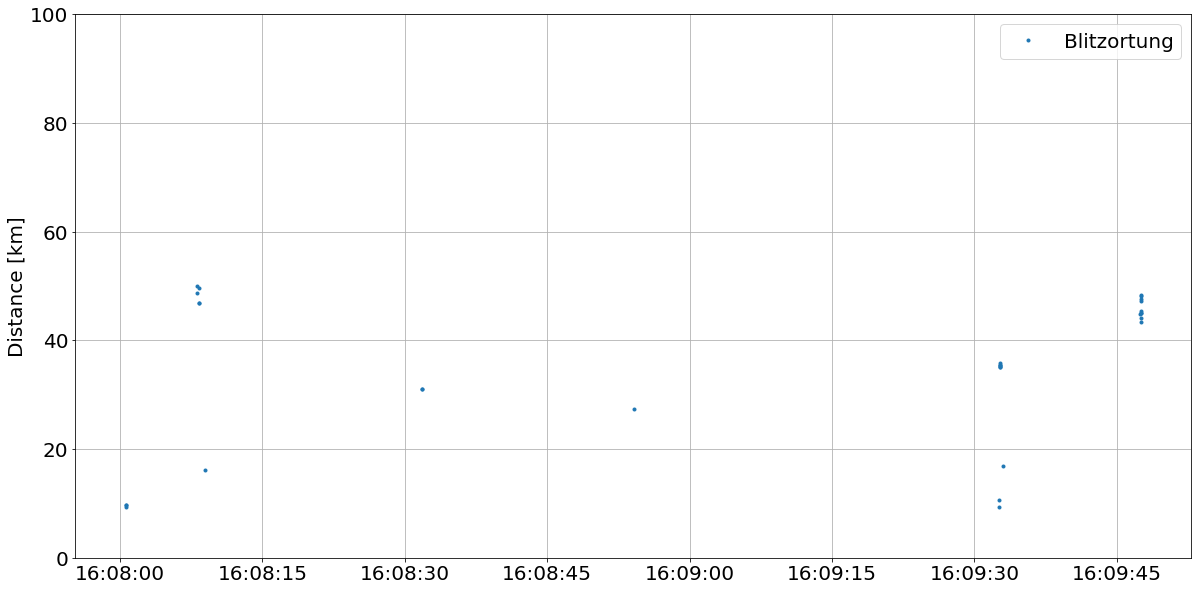

In [88]:
fig, (ax6) = plt.subplots(nrows=1, sharex=True, figsize=(20,10))
plt.rcParams.update({'font.size': 20})

ax6.plot(blitz.time, blitz.km, ls='', marker='.', label='Blitzortung')
ax6.set_ylabel('Distance [km]')
ax6.set_ylim(0,100)
ax6.grid()
#ax6.vlines(x=gps['timeR'], ymin=0, ymax=130, color='red', label='Trigger STP', lw=1, linestyle='-', alpha=0.3)
ax6.legend()
plt.rcParams.update({'font.size': 20})


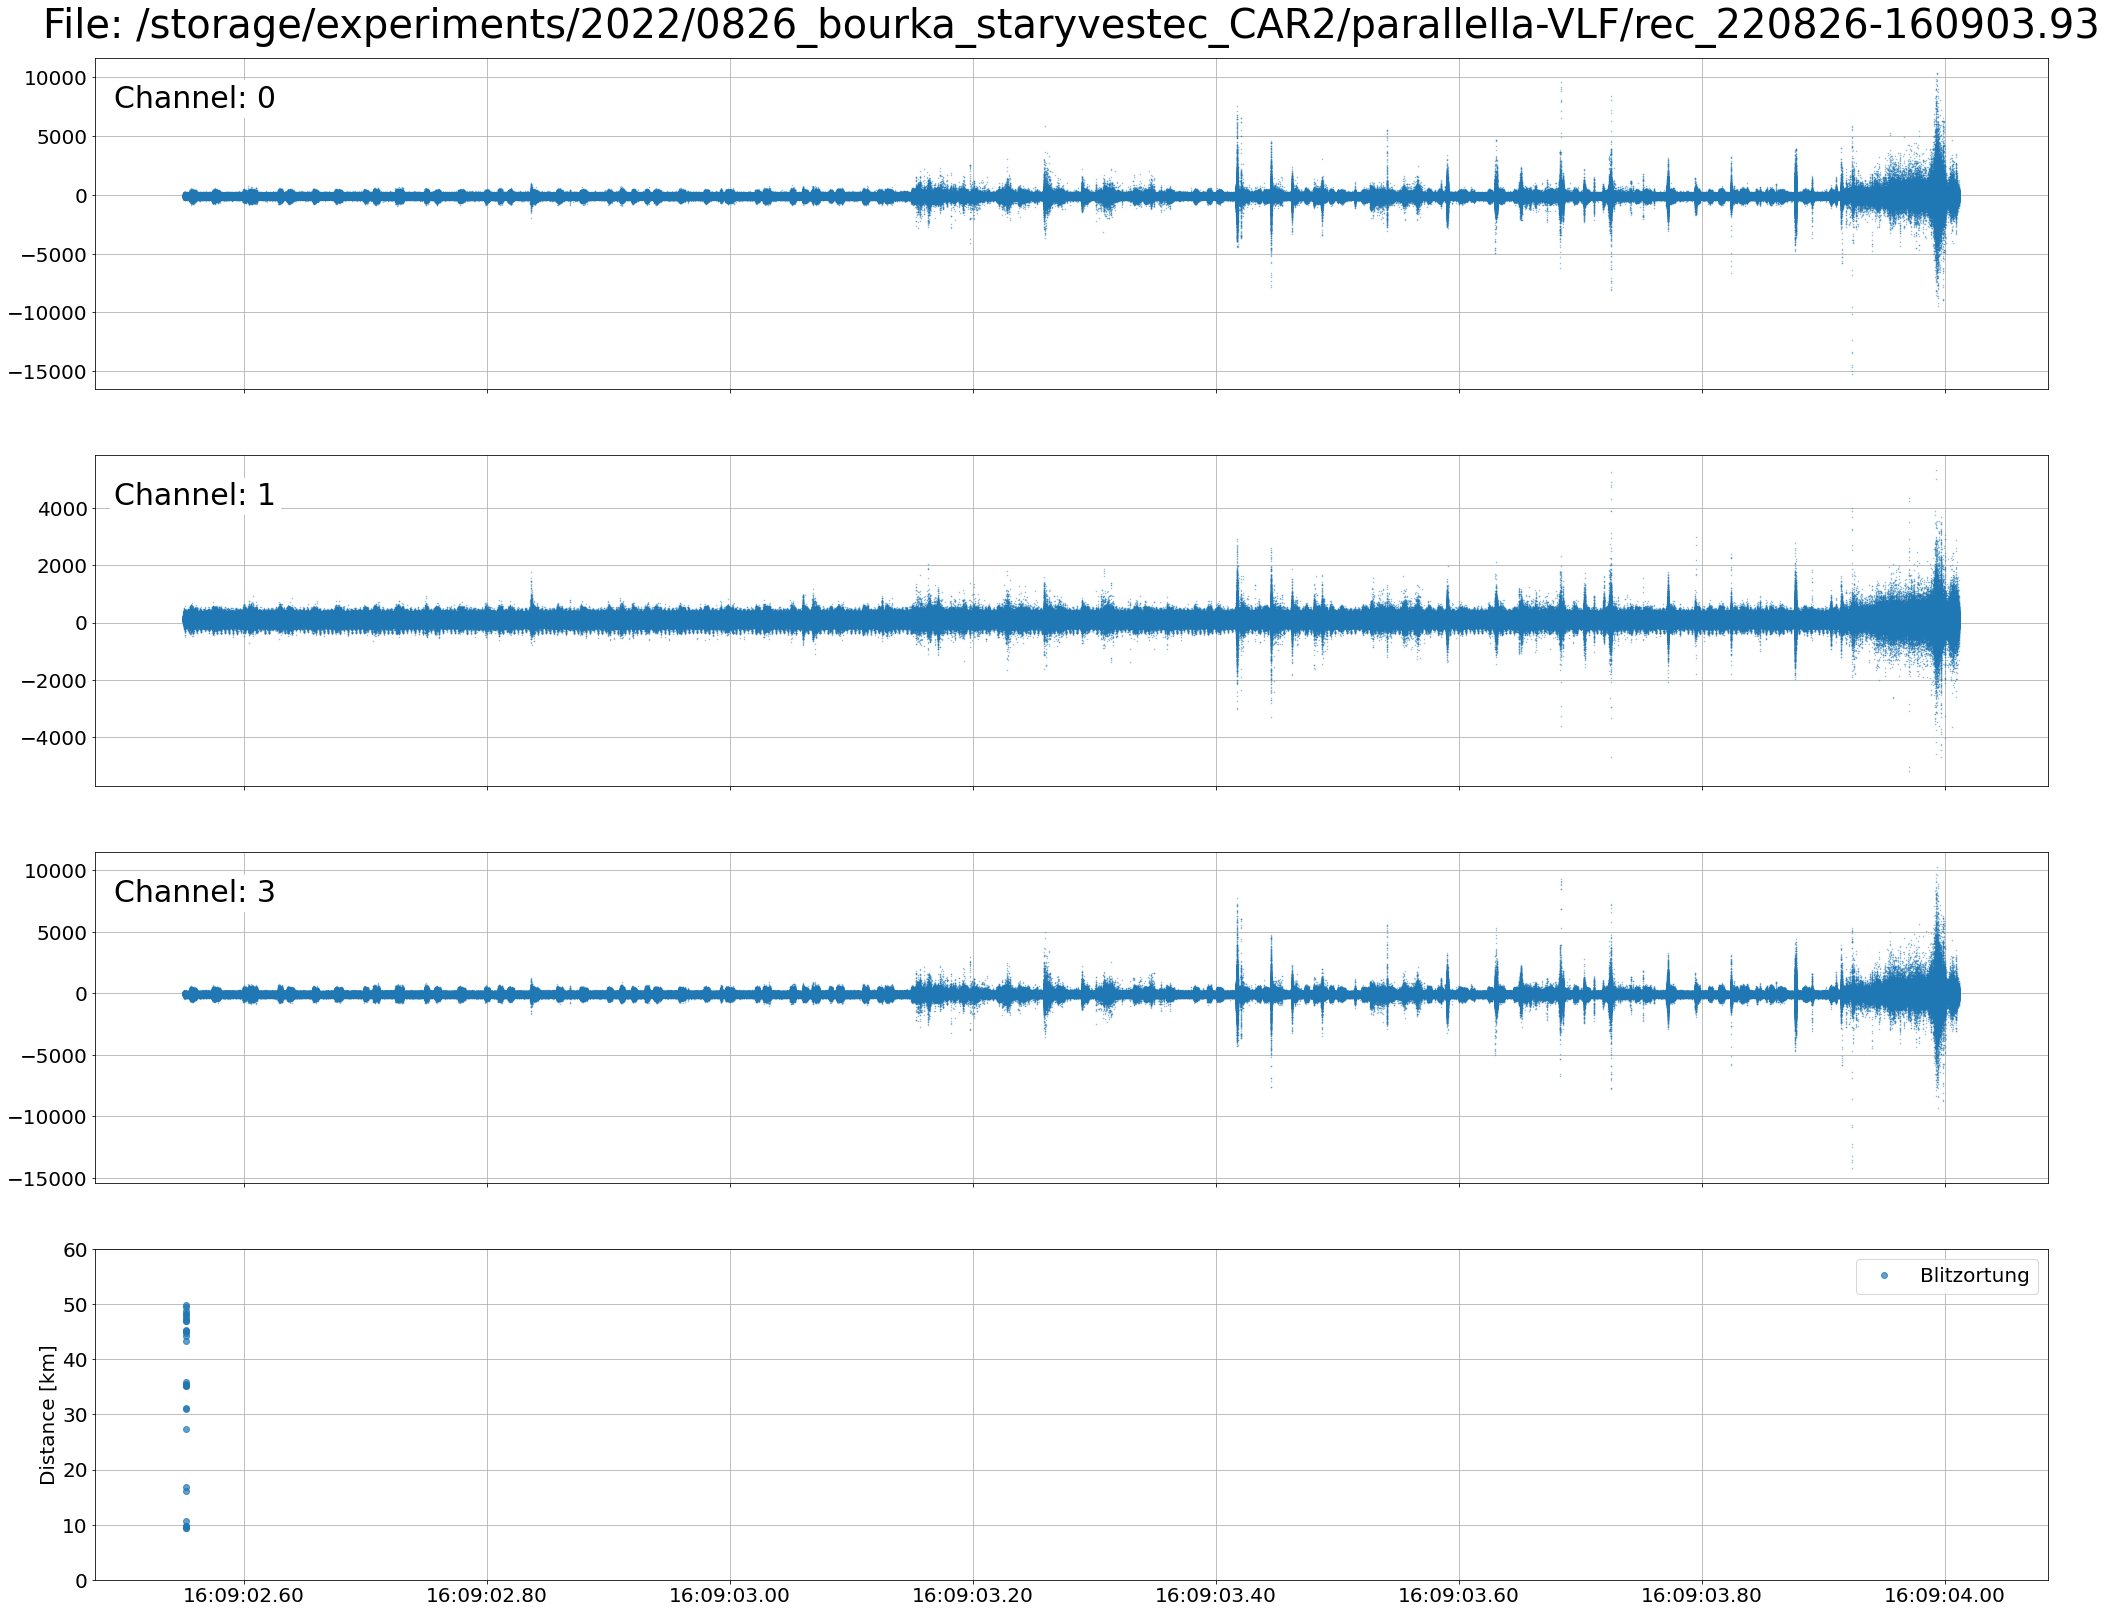

In [91]:

filepath = '/storage/experiments/2022/0826_bourka_staryvestec_CAR2/parallella-VLF/rec_220826-160903.93'
#filepath = '/storage/experiments/2022/0826_bourka_staryvestec_CAR2/parallella-VLF/rec_220826-161131.74'

channels = [0, 1, 3]
nrows = len(channels) + 1
fig, axs = plt.subplots(figsize=(35, 7 * nrows), nrows=nrows, sharex=True)

mintime = None
data = []

# Load and process data
try:
    with open(filepath, 'rb') as file:
        fn = os.path.basename(filepath)
        h, samples, synclog = loadrec(file)
        t2s, s2t, ticker, formatter = assign_time_axis(fn, h, synclog)

        time = s2t(0)
        mintime = time if mintime is None else min(mintime, time)

        # Add data to the list for later processing
        data.append((filepath, h, samples, synclog, t2s, s2t, ticker, formatter))
except Exception as e:
    print(f"Exception: {e}")

# Render data
ax_idx = 0

for i, (filepath, h, samples, synclog, t2s, s2t, ticker, formatter) in enumerate(data):
    offset = -int(t2s(mintime))

    # Use full path for the file label only once above the first channel
    axs[ax_idx].set_title(f"File: {filepath}", fontsize=40, pad=20)

    for ch in channels:
        a = (h['preTrigger'] - h['preTrigger']) * h['descSpan'] // 16
        b = (h['preTrigger'] + h['postTrigger']) * h['descSpan'] // 16
        signal_samples = samples[a:b, ch]

        axs[ax_idx].xaxis.set_major_locator(ticker)
        axs[ax_idx].xaxis.set_major_formatter(formatter)
        axs[ax_idx].plot(range(a + offset, b + offset), signal_samples, linestyle="", marker=".", alpha=0.5, markersize=1)

        # Improved channel label visibility
        axs[ax_idx].annotate(f"Channel: {ch}", xy=(0.01, 0.85), xycoords='axes fraction', fontsize=30, backgroundcolor='white')

        axs[ax_idx].grid()
        
        ax_idx += 1

axs[ax_idx].plot(blitz.time, blitz.km, ls='', marker='o', label='Blitzortung', alpha=0.7)
axs[ax_idx].set_ylabel('Distance [km]')
axs[ax_idx].set_ylim(0,60)
axs[ax_idx].grid()
#ax6.vlines(x=gps['timeR'], ymin=0, ymax=130, color='red', label='Trigger STP', lw=1, linestyle='-', alpha=0.3)
axs[ax_idx].legend()
        
plt.show()


In [103]:
import os
import sys
from readrec import *
import matplotlib
from scipy.signal import find_peaks
import numpy as np
import pandas as pd
import re


def extract_signal_fragment_with_datetime(filepath, date_str, start_time_str, end_time_str, selected_channels, sps):

    fragments = []

    id_to_station = {}

    

    start_datetime = pd.to_datetime(f'{date_str} {start_time_str}')

    end_datetime = pd.to_datetime(f'{date_str} {end_time_str}')




    car_match = re.search(r'CAR(\d+)', filepath)

    if car_match:

        station_id = car_match.group(1)

    else:

        raise ValueError("Station identifier not found in the file path.")



    with open(filepath, 'rb') as file:

        fn = os.path.basename(filepath)

        h, samples, synclog = loadrec(file)  # Using the actual function from readrec.py

        t2s, s2t, _, _ = assign_time_axis(fn, h, synclog)  # Using the actual function



        start_index = int(t2s(start_datetime))



        fragment = samples[:, selected_channels]

        timestamps = pd.date_range(start=s2t(start_index), periods=fragment.shape[0], freq=pd.to_timedelta(1/sps, unit='s'))

        combined_data = pd.DataFrame(fragment, index=timestamps, columns=[f'Channel_{ch}' for ch in selected_channels])



        fragments.append(('CAR' + station_id + '_' + fn, combined_data))

        id_to_station['CAR' + station_id + '_' + fn] = 'CAR' + station_id



    return combined_data, id_to_station


In [104]:
file = '/storage/experiments/2022/0826_bourka_staryvestec_CAR2/parallella-VLF/rec_220826-160903.93'

date_str = "2022-08-26"
time_window_start = "10:00:01.0"  # Začátek extrakce
time_window_end = "22:10:22.52"    # Konec extrakce
selected_channels = [0, 1, 3] # Selection of channels with antenna connected

fragments, id_to_station = extract_signal_fragment_with_datetime(file, date_str, time_window_start, time_window_end, selected_channels, sps)

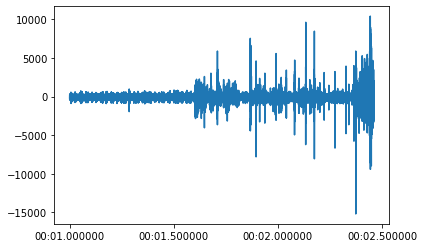

In [105]:
plt.plot(fragments['Channel_0'])

In [102]:
fragments

,Channel_0,Channel_1,Channel_3
2022-08-26 10:00:01.000000000,-144,176,-80
2022-08-26 10:00:01.000000100,-96,128,-96
2022-08-26 10:00:01.000000200,-144,240,-48
2022-08-26 10:00:01.000000300,-224,192,-16
2022-08-26 10:00:01.000000400,-144,224,-128
...,...,...,...
2022-08-26 10:00:02.461452300,176,288,-128
2022-08-26 10:00:02.461452400,-112,144,-160
2022-08-26 10:00:02.461452500,-96,384,32
2022-08-26 10:00:02.461452600,0,240,0
